In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df=pd.read_csv("Ames_Housing_Data.csv")

In [4]:
df.head()

PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  526301100           20        RL         141.0     31770   Pave   NaN   
1  526350040           20        RH          80.0     11622   Pave   NaN   
2  526351010           20        RL          81.0     14267   Pave   NaN   
3  526353030           20        RL          93.0     11160   Pave   NaN   
4  527105010           60        RL          74.0     13830   Pave   NaN   

  Lot Shape Land Contour Utilities  ... Pool Area Pool QC  Fence Misc Feature  \
0       IR1          Lvl    AllPub  ...         0     NaN    NaN          NaN   
1       Reg          Lvl    AllPub  ...         0     NaN  MnPrv          NaN   
2       IR1          Lvl    AllPub  ...         0     NaN    NaN         Gar2   
3       Reg          Lvl    AllPub  ...         0     NaN    NaN          NaN   
4       IR1          Lvl    AllPub  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold  Sale Type  Sale Condition  SalePrice  
0        0       5    2010        WD           Normal     215000  
1        0       6    2010        WD           Normal     105000  
2    12500       6    2010        WD           Normal     172000  
3        0       4    2010        WD           Normal     244000  
4        0       3    2010        WD           Normal     189900  

[5 rows x 81 columns]

In [12]:
df.describe()['SalePrice']

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [30]:
df['SalePrice'].mode()

0    135000
dtype: int64

In [31]:
df['SalePrice'].mean()

180796.0600682594

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

# Correlation

- Do correlation to find the high correlation
- Positive high correlation is (0.5 ~ 1.0)
- Negative high correlation is (-0.5 ~ -1.0)
- Correlation is only for numerical variable

<AxesSubplot:>

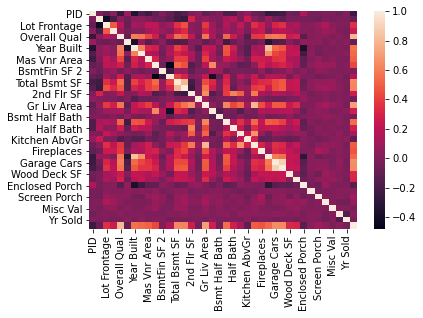

In [5]:
sns.heatmap(df.corr())

In [6]:
#sort the value of high correlation in the corr() graph above

df.corr()['SalePrice'].sort_values()

PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0

1. Positive High Correlation

- Fireplaces         0.474558
- TotRms AbvGrd      0.495474
- Mas Vnr Area       0.508285
- Garage Yr Blt      0.526965
- Year Remod/Add     0.532974
- Full Bath          0.545604
- Year Built         0.558426
- 1st Flr SF         0.621676
- Total Bsmt SF      0.632280
- Garage Area        0.640401
- Garage Cars        0.647877
- Gr Liv Area        0.706780
- Overall Qual       0.799262

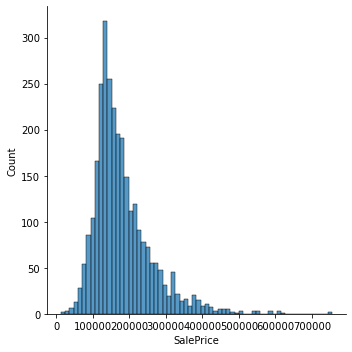

In [7]:
sns.displot(df['SalePrice'])

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

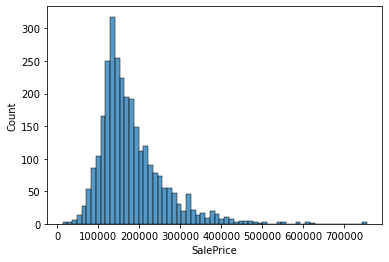

In [8]:
sns.histplot(df['SalePrice'])

# Fireplaces

<AxesSubplot:xlabel='Fireplaces', ylabel='SalePrice'>

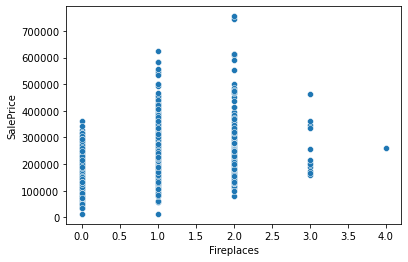

In [9]:
sns.scatterplot(data=df,x='Fireplaces', y = 'SalePrice')

<AxesSubplot:xlabel='Fireplaces', ylabel='SalePrice'>

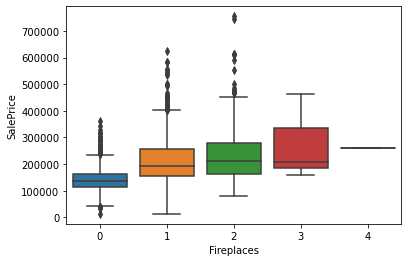

In [10]:
sns.boxplot(data=df,x='Fireplaces', y = 'SalePrice')

In [11]:
df[(df['Fireplaces']>3.5)&(df['SalePrice']<300000)]

PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
2498  532476050           80        RL         100.0     14330   Pave   NaN   

     Lot Shape Land Contour Utilities  ... Pool Area Pool QC  Fence  \
2498       IR1          Low    AllPub  ...       800      Gd  GdPrv   

     Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  Sale Condition  \
2498          NaN        0       1    2006        WD           Normal   

      SalePrice  
2498     260000  

[1 rows x 81 columns]

In [12]:
df = df.drop(2498,axis=0)

<AxesSubplot:xlabel='Fireplaces', ylabel='SalePrice'>

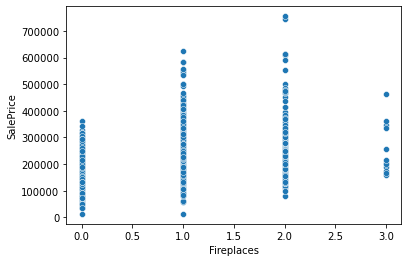

In [13]:
sns.scatterplot(data=df,x='Fireplaces', y = 'SalePrice')

# TotRms AbvGrd

<AxesSubplot:xlabel='TotRms AbvGrd', ylabel='SalePrice'>

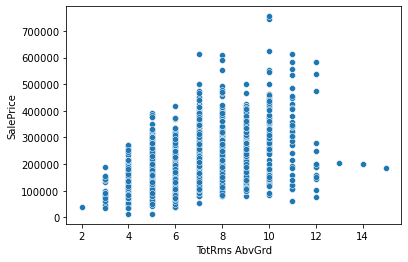

In [14]:
sns.scatterplot(data=df,x='TotRms AbvGrd', y = 'SalePrice')

In [15]:
df[(df['TotRms AbvGrd']>12)&(df['SalePrice']<300000)]

PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
925   909279010           90        RL           NaN      8145   Pave   NaN   
2180  908154195           20        RL         128.0     39290   Pave   NaN   
2194  909176080          190        RH          60.0     10896   Pave  Pave   

     Lot Shape Land Contour Utilities  ... Pool Area Pool QC Fence  \
925        IR1          HLS    AllPub  ...         0     NaN   NaN   
2180       IR1          Bnk    AllPub  ...         0     NaN   NaN   
2194       Reg          Bnk    AllPub  ...         0     NaN   NaN   

     Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  Sale Condition  \
925           NaN        0       7    2009        WD           Normal   
2180         Elev    17000      10    2007        New         Partial   
2194          NaN        0       3    2007        WD          Abnorml   

      SalePrice  
925      205000  
2180     183850  
2194     200000  

[3 rows x 81 columns]

In [16]:
ind_drop = df[(df['TotRms AbvGrd']>12)&(df['SalePrice']<300000)].index

In [17]:
ind_drop

Int64Index([925, 2180, 2194], dtype='int64')

In [18]:
df = df.drop(ind_drop,axis =0)

<AxesSubplot:xlabel='TotRms AbvGrd', ylabel='SalePrice'>

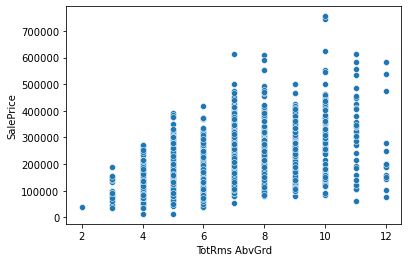

In [19]:
sns.scatterplot(data=df,x='TotRms AbvGrd', y = 'SalePrice')

In [20]:
df[(df['TotRms AbvGrd']>11)&(df['SalePrice']>400000)]

PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
15    527216070           60        RL          47.0     53504   Pave   NaN   
433   528110090           60        RL         107.0     13891   Pave   NaN   
2666  902400110           75        RM          90.0     22950   Pave   NaN   

     Lot Shape Land Contour Utilities  ... Pool Area Pool QC  Fence  \
15         IR2          HLS    AllPub  ...         0     NaN    NaN   
433        Reg          Lvl    AllPub  ...         0     NaN    NaN   
2666       IR2          Lvl    AllPub  ...         0     NaN  GdPrv   

     Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  Sale Condition  \
15            NaN        0       6    2010        WD           Normal   
433           NaN        0       1    2009        New         Partial   
2666          NaN        0       6    2006        WD           Normal   

      SalePrice  
15       538000  
433      582933  
2666     475000  

[3 rows x 81 columns]

In [21]:
ind_drop = df[(df['TotRms AbvGrd']>11)&(df['SalePrice']>400000)].index
ind_drop

Int64Index([15, 433, 2666], dtype='int64')

In [22]:
df = df.drop(ind_drop,axis =0)

<AxesSubplot:xlabel='TotRms AbvGrd', ylabel='SalePrice'>

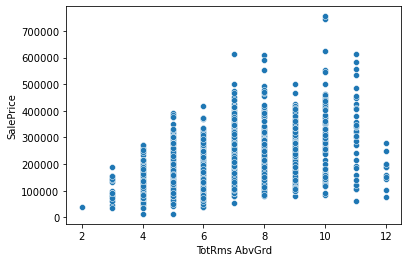

In [23]:
sns.scatterplot(data=df,x='TotRms AbvGrd', y = 'SalePrice')

<AxesSubplot:xlabel='TotRms AbvGrd', ylabel='SalePrice'>

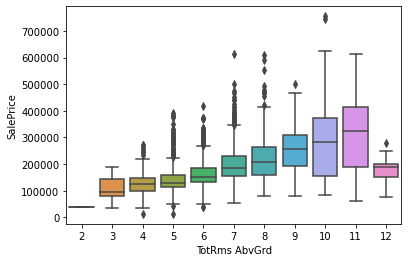

In [24]:
sns.boxplot(data=df,x='TotRms AbvGrd', y = 'SalePrice')

# Mas Vnr Area

<AxesSubplot:xlabel='Mas Vnr Area', ylabel='SalePrice'>

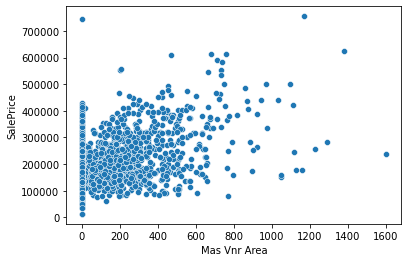

In [25]:
sns.scatterplot(data=df,x='Mas Vnr Area', y = 'SalePrice')

In [26]:
df[(df['Mas Vnr Area']>1400)&(df['SalePrice']<300000)]

PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
1849  533241030           60        FV          66.0      7399   Pave  Pave   

     Lot Shape Land Contour Utilities  ... Pool Area Pool QC Fence  \
1849       IR1          Lvl    AllPub  ...         0     NaN   NaN   

     Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  Sale Condition  \
1849          NaN        0       6    2007        WD           Normal   

      SalePrice  
1849     239000  

[1 rows x 81 columns]

In [27]:
df = df.drop(1849,axis=0)

<AxesSubplot:xlabel='Mas Vnr Area', ylabel='SalePrice'>

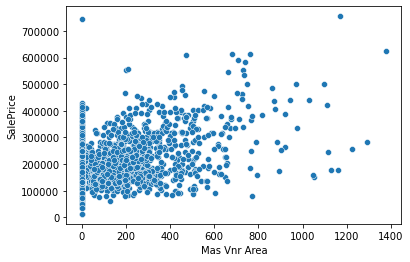

In [28]:
sns.scatterplot(data=df,x='Mas Vnr Area', y = 'SalePrice')

# Garage Yr Blt

<AxesSubplot:xlabel='Garage Yr Blt', ylabel='SalePrice'>

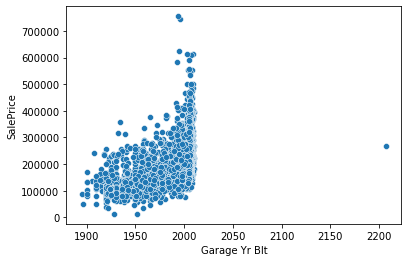

In [29]:
sns.scatterplot(data=df,x='Garage Yr Blt', y = 'SalePrice')

In [30]:
df[(df['Garage Yr Blt']>2050)&(df['SalePrice']<300000)]

PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
2260  916384070           20        RL          68.0      8298   Pave   NaN   

     Lot Shape Land Contour Utilities  ... Pool Area Pool QC Fence  \
2260       IR1          HLS    AllPub  ...         0     NaN   NaN   

     Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  Sale Condition  \
2260          NaN        0       9    2007        New         Partial   

      SalePrice  
2260     267300  

[1 rows x 81 columns]

In [31]:
df = df.drop(2260,axis=0)

<AxesSubplot:xlabel='Garage Yr Blt', ylabel='SalePrice'>

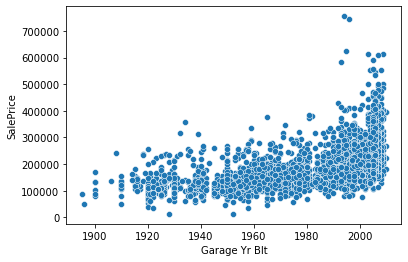

In [32]:
sns.scatterplot(data=df,x='Garage Yr Blt', y = 'SalePrice')

# Year Remod/Add

<AxesSubplot:xlabel='Year Remod/Add', ylabel='SalePrice'>

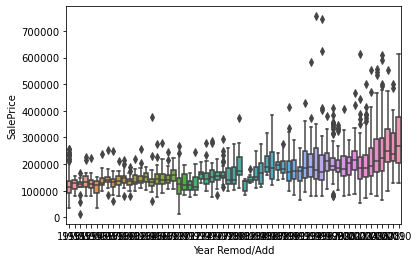

In [33]:
sns.boxplot(data=df,x='Year Remod/Add', y = 'SalePrice')

# Full Bath

<AxesSubplot:xlabel='Full Bath', ylabel='SalePrice'>

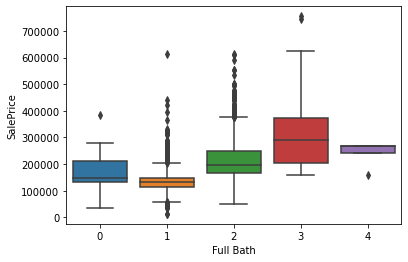

In [34]:
sns.boxplot(data=df,x='Full Bath', y = 'SalePrice')

In [35]:
df[(df['Full Bath']>3)&(df['SalePrice']<200000)]

PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
336  923276250           90        RL          70.0      7700   Pave   NaN   

    Lot Shape Land Contour Utilities  ... Pool Area Pool QC Fence  \
336       Reg          Lvl    AllPub  ...         0     NaN   NaN   

    Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  Sale Condition  \
336         Shed      600       2    2010        WD           Normal   

     SalePrice  
336     159000  

[1 rows x 81 columns]

In [36]:
df = df.drop(336,axis=0)

<AxesSubplot:xlabel='Full Bath', ylabel='SalePrice'>

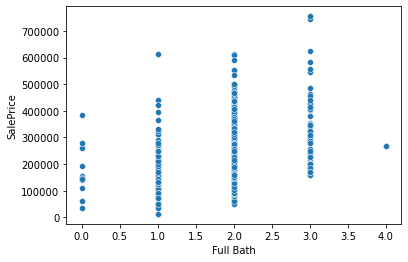

In [37]:
sns.scatterplot(data=df,x='Full Bath', y = 'SalePrice')

# Year Built

<AxesSubplot:xlabel='Year Built', ylabel='SalePrice'>

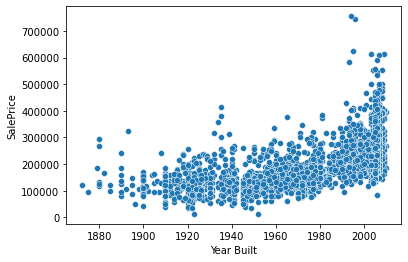

In [38]:
sns.scatterplot(data=df,x='Year Built', y = 'SalePrice')

<AxesSubplot:xlabel='Year Built', ylabel='SalePrice'>

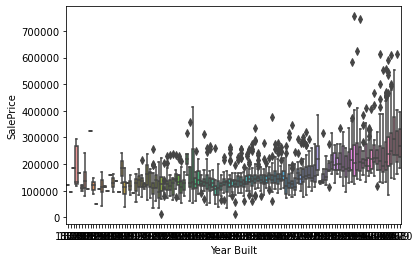

In [39]:
sns.boxplot(data=df,x='Year Built', y = 'SalePrice')

In [40]:
df[(df['Year Built']>1980)&(df['SalePrice']>600000)]

PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
44    528150070           20        RL         100.0     12919   Pave   NaN   
432   528110020           20        RL         105.0     13693   Pave   NaN   
1063  528164060           20        RL         106.0     12720   Pave   NaN   
1760  528320050           60        RL         160.0     15623   Pave   NaN   
1767  528351010           60        RL         104.0     21535   Pave   NaN   
2445  528320060           60        RL         118.0     35760   Pave   NaN   

     Lot Shape Land Contour Utilities  ... Pool Area Pool QC  Fence  \
44         IR1          Lvl    AllPub  ...         0     NaN    NaN   
432        Reg          Lvl    AllPub  ...         0     NaN    NaN   
1063       Reg          HLS    AllPub  ...       144      Ex    NaN   
1760       IR1          Lvl    AllPub  ...       555      Ex  MnPrv   
1767       IR1          Lvl    AllPub  ...         0     NaN    NaN   
2445       IR1          Lvl    AllPub  ...         0     NaN    NaN   

     Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  Sale Condition  \
44            NaN        0       3    2010        New         Partial   
432           NaN        0       3    2009        WD           Normal   
1063          NaN        0       2    2008        WD           Normal   
1760          NaN        0       7    2007        WD          Abnorml   
1767          NaN        0       1    2007        WD           Normal   
2445          NaN        0       7    2006        WD           Normal   

      SalePrice  
44       611657  
432      610000  
1063     615000  
1760     745000  
1767     755000  
2445     625000  

[6 rows x 81 columns]

In [41]:
ind_drop = df[(df['Year Built']>19800)&(df['SalePrice']>600000)].index

In [42]:
df = df.drop(ind_drop, axis =0)

# 1st Flr SF

<AxesSubplot:xlabel='1st Flr SF', ylabel='SalePrice'>

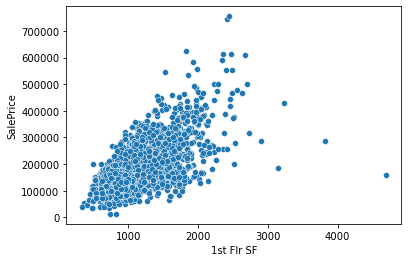

In [43]:
sns.scatterplot(data=df,x='1st Flr SF', y = 'SalePrice')

In [44]:
df[(df['1st Flr SF']>3000)&(df['SalePrice']<300000)]

PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
1497  908154080           20        RL         123.0     47007   Pave   NaN   
1498  908154235           60        RL         313.0     63887   Pave   NaN   
2181  908154205           60        RL         130.0     40094   Pave   NaN   

     Lot Shape Land Contour Utilities  ... Pool Area Pool QC Fence  \
1497       IR1          Lvl    AllPub  ...         0     NaN   NaN   
1498       IR3          Bnk    AllPub  ...       480      Gd   NaN   
2181       IR1          Bnk    AllPub  ...         0     NaN   NaN   

     Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  Sale Condition  \
1497          NaN        0       7    2008        WD           Normal   
1498          NaN        0       1    2008        New         Partial   
2181          NaN        0      10    2007        New         Partial   

      SalePrice  
1497     284700  
1498     160000  
2181     184750  

[3 rows x 81 columns]

In [45]:
ind_drop = df[(df['1st Flr SF']>3000)&(df['SalePrice']<300000)].index

In [46]:
ind_drop

Int64Index([1497, 1498, 2181], dtype='int64')

In [47]:
df = df.drop(ind_drop,axis =0)

<AxesSubplot:xlabel='1st Flr SF', ylabel='SalePrice'>

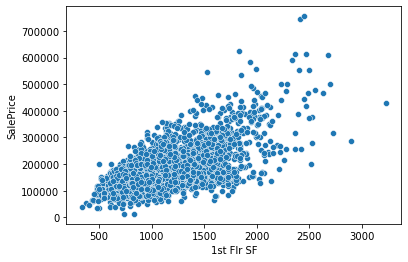

In [48]:
sns.scatterplot(data=df,x='1st Flr SF', y = 'SalePrice')

# Total Bsmt SF

<AxesSubplot:xlabel='Total Bsmt SF', ylabel='SalePrice'>

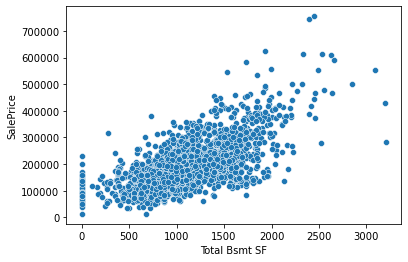

In [49]:
sns.scatterplot(data=df,x='Total Bsmt SF', y = 'SalePrice')

In [50]:
df[(df['Total Bsmt SF']>2500)&(df['SalePrice']<450000)]

PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
379   527355150           20        RL          80.0      9600   Pave   NaN   
444   528142130           20        RL          85.0     10655   Pave   NaN   
1772  528366050           20        RL           NaN     12692   Pave   NaN   

     Lot Shape Land Contour Utilities  ... Pool Area Pool QC  Fence  \
379        Reg          Lvl    AllPub  ...         0     NaN  MnPrv   
444        IR1          Lvl    AllPub  ...         0     NaN    NaN   
1772       IR1          Lvl    AllPub  ...         0     NaN    NaN   

     Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  Sale Condition  \
379           NaN        0       7    2009        WD           Normal   
444           NaN        0      10    2009        WD           Normal   
1772          NaN        0       5    2007        WD           Normal   

      SalePrice  
379      278000  
444      284000  
1772     430000  

[3 rows x 81 columns]

In [51]:
ind_drop = df[(df['Total Bsmt SF']>2500)&(df['SalePrice']<450000)].index

In [52]:
df = df.drop(ind_drop,axis =0)

<AxesSubplot:xlabel='Total Bsmt SF', ylabel='SalePrice'>

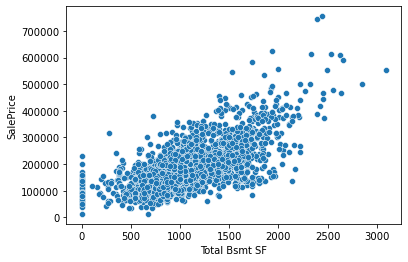

In [53]:
sns.scatterplot(data=df,x='Total Bsmt SF', y = 'SalePrice')

# Garage Area

<AxesSubplot:xlabel='Garage Area', ylabel='SalePrice'>

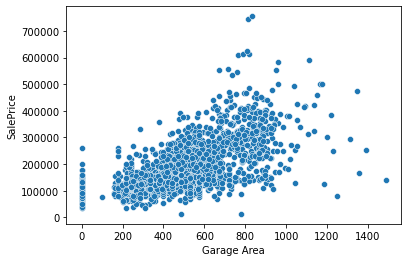

In [54]:
sns.scatterplot(data=df,x='Garage Area', y = 'SalePrice')

In [55]:
df[(df['Garage Area']>1200)&(df['SalePrice']<200000)]

PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
1258  535380140           50        RL          60.0     10836   Pave  Grvl   
1557  911226010           30   C (all)         120.0     18000   Grvl   NaN   
2282  923205025          190        RL           NaN     32463   Pave   NaN   

     Lot Shape Land Contour Utilities  ... Pool Area Pool QC Fence  \
1258       Reg          Lvl    AllPub  ...         0     NaN  GdWo   
1557       Reg          Low    AllPub  ...         0     NaN   NaN   
2282       Reg          Low    AllPub  ...         0     NaN   NaN   

     Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  Sale Condition  \
1258          NaN        0       6    2008        WD           Normal   
1557         Shed      560       8    2008      ConLD          Normal   
2282          NaN        0       3    2007        WD           Normal   

      SalePrice  
1258     139000  
1557      81000  
2282     168000  

[3 rows x 81 columns]

In [56]:
ind_drop = df[(df['Garage Area']>1200)&(df['SalePrice']<200000)].index

In [57]:
df = df.drop(ind_drop,axis =0)

<AxesSubplot:xlabel='Garage Area', ylabel='SalePrice'>

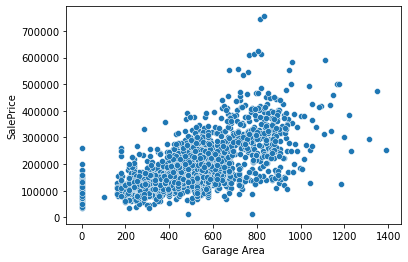

In [58]:
sns.scatterplot(data=df,x='Garage Area', y = 'SalePrice')

# Garage Cars

<AxesSubplot:xlabel='Garage Cars', ylabel='SalePrice'>

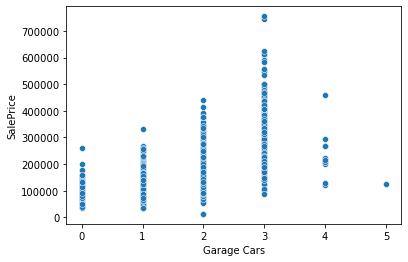

In [59]:
sns.scatterplot(data=df,x='Garage Cars', y = 'SalePrice')

In [60]:
df[(df['Garage Cars']>4)&(df['SalePrice']<200000)]

PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
746  903236040           30        RM          50.0      8635   Pave   NaN   

    Lot Shape Land Contour Utilities  ... Pool Area Pool QC Fence  \
746       Reg          Lvl    AllPub  ...         0     NaN   NaN   

    Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  Sale Condition  \
746          NaN        0       8    2009        WD           Normal   

     SalePrice  
746     126500  

[1 rows x 81 columns]

In [61]:
df = df.drop(746,axis =0)

<AxesSubplot:xlabel='Garage Cars', ylabel='SalePrice'>

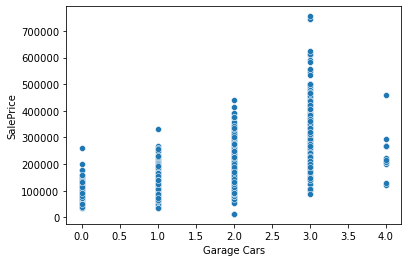

In [62]:
sns.scatterplot(data=df,x='Garage Cars', y = 'SalePrice')

<AxesSubplot:xlabel='Garage Cars', ylabel='SalePrice'>

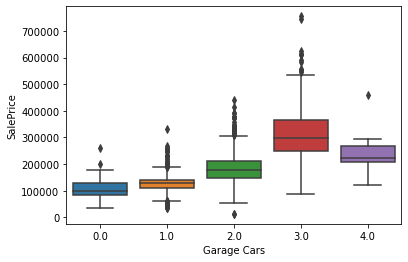

In [63]:
sns.boxplot(data=df,x='Garage Cars', y = 'SalePrice')

# Gr Liv Area

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

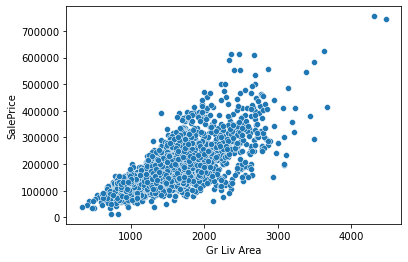

In [64]:
sns.scatterplot(data=df,x='Gr Liv Area', y = 'SalePrice')

In [65]:
df[(df['Gr Liv Area']>4000)&(df['SalePrice']>600000)]

PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
1760  528320050           60        RL         160.0     15623   Pave   NaN   
1767  528351010           60        RL         104.0     21535   Pave   NaN   

     Lot Shape Land Contour Utilities  ... Pool Area Pool QC  Fence  \
1760       IR1          Lvl    AllPub  ...       555      Ex  MnPrv   
1767       IR1          Lvl    AllPub  ...         0     NaN    NaN   

     Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  Sale Condition  \
1760          NaN        0       7    2007        WD          Abnorml   
1767          NaN        0       1    2007        WD           Normal   

      SalePrice  
1760     745000  
1767     755000  

[2 rows x 81 columns]

In [66]:
ind_drop = df[(df['Gr Liv Area']>4000)&(df['SalePrice']>600000)].index

In [67]:
ind_drop

Int64Index([1760, 1767], dtype='int64')

In [68]:
df = df.drop(ind_drop,axis =0)

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

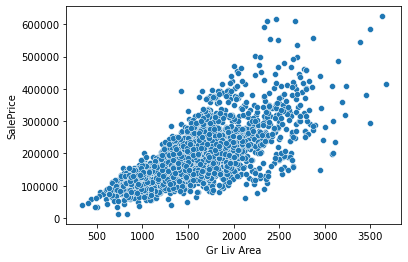

In [69]:
sns.scatterplot(data=df,x='Gr Liv Area', y = 'SalePrice')

# Overall Qual

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

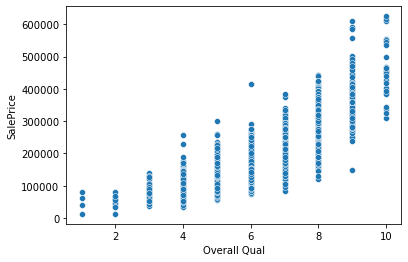

In [70]:
sns.scatterplot(data=df,x='Overall Qual', y = 'SalePrice')

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

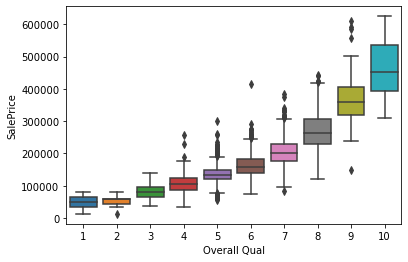

In [71]:
sns.boxplot(data=df,x='Overall Qual', y = 'SalePrice')

In [72]:
df[(df['Overall Qual']>8)&(df['SalePrice']<200000)]

PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
1182  533350090           60        RL           NaN     24572   Pave   NaN   

     Lot Shape Land Contour Utilities  ... Pool Area Pool QC Fence  \
1182       IR1          Lvl    AllPub  ...         0     NaN   NaN   

     Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  Sale Condition  \
1182          NaN        0       6    2008        WD           Family   

      SalePrice  
1182     150000  

[1 rows x 81 columns]

In [73]:
df = df.drop(1182, axis=0)

In [74]:
df.shape

(2907, 81)

In [75]:
2930 - 2907

23

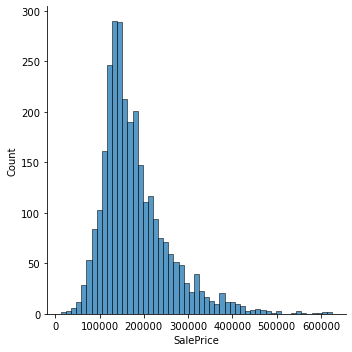

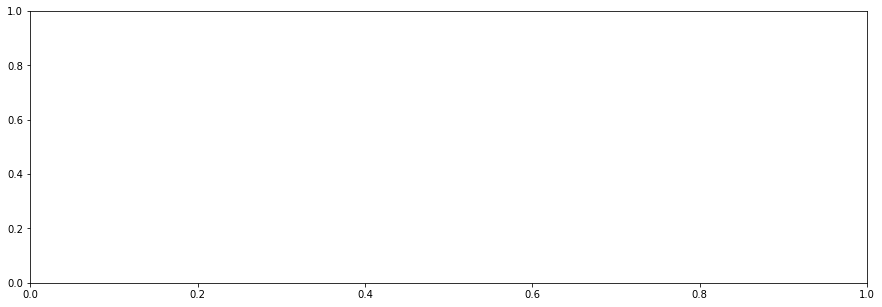

In [76]:
sns.displot(df['SalePrice'])
fig, ax = plt.subplots(figsize=(15,5))

In [77]:
df.to_csv("Ames_housing_outlier.csv", index = False)

In [78]:
df.shape

(2907, 81)